In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import xgboost as xgb
# import scipy as sc
# from datetime import datetime

# from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
# from sklearn.model_selection import train_test_split, TimeSeriesSplit

# import warnings
# warnings.filterwarnings('ignore')

# %pylab inline
# sns.set_style('dark')

In [2]:
data = pd.read_csv('./datasets/bitcoin_2019aug/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
# data['str_time'] = data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M')
data.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 07:53:00   NaN   NaN   NaN    NaN           NaN   
2 2011-12-31 07:54:00   NaN   NaN   NaN    NaN           NaN   
3 2011-12-31 07:55:00   NaN   NaN   NaN    NaN           NaN   
4 2011-12-31 07:56:00   NaN   NaN   NaN    NaN           NaN   

   Volume_(Currency)  Weighted_Price  
0                2.0            4.39  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN

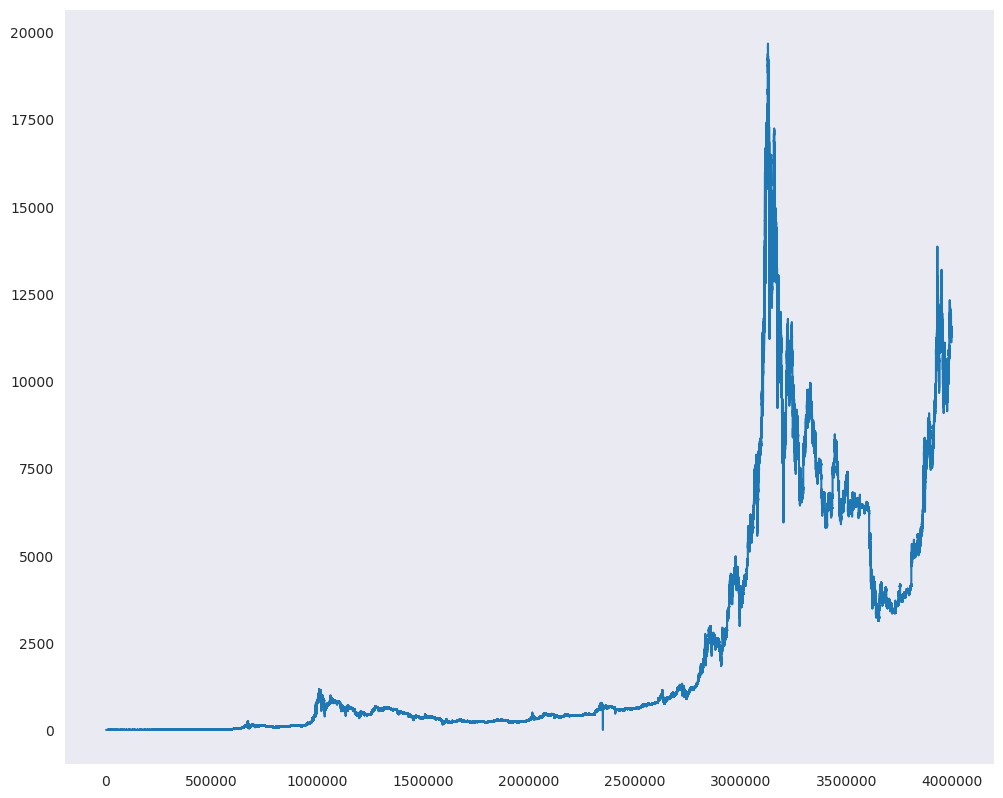

In [5]:
plt.figure(dpi=100, figsize=(12,10))
plt.plot(data['Close'])

In [9]:
data_complete = data[data['Close'].isna()==False]

In [4]:
print('Overrall :', data.shape[0])
print("-" * 35)
print('NA : \n', data.isna().sum(), sep='')
print("-" * 35)
lost = round(data['Close'].isna().sum()/data.shape[0] * 100, 3)
print(f'Lost data : {lost}%')

Overrall : 3997697
-----------------------------------
NA : 
Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64
-----------------------------------
Lost data : 30.815%


In [5]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 
            'Volume_(Currency)', 'Weighted_Price']:
    data[col] = data[col].interpolate()

In [6]:
data.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 07:53:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 07:54:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 07:55:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 07:56:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39

In [7]:
print('Overrall :', data.shape[0])
print("-" * 35)
print('NA : \n', data.isna().sum(), sep='')
print("-" * 35)
lost = round(data['Close'].isna().sum()/data.shape[0] * 100, 3)
print(f'Lost data : {lost}%')

Overrall : 3997697
-----------------------------------
NA : 
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64
-----------------------------------
Lost data : 0.0%


In [30]:
data['hour'] = data.Timestamp.dt.strftime('%Y-%m-%d %H')